In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Generic Packages
import numpy as np
import os
import pandas as pd

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread

In [3]:
categories = ['가지볶음','고사리나물','미역줄기볶음','숙주나물','시금치나물','애호박볶음']
categories_label = {category:i for i, category in enumerate(categories)}

nb_categories = len(categories)

In [4]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/traindata/kfood/나물'
  images = []
  labels = []
# Iterate through each folder corresponding to a category
  for category in categories:
    path = os.path.join(rootdir,category)
    label = categories_label[category]

# Iterate through each image in our folder
    for img in tqdm(os.listdir(path)):
      try:
        # Get the path name of the image
        img_path = os.path.join(path, img)

        # Open and resize the img
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(150, 150))

        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
      except Exception as someReadingError:
        pass

  return images , labels

In [5]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100%|██████████| 1002/1002 [00:27<00:00, 37.04it/s]


In [6]:
X=np.array(Images)
Y=np.array(Labels)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# 0 ~ 1 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
30/30 [==============================] - 33s 1s/step - loss: 1.8746 - accuracy: 0.3322 - val_loss: 1.1525 - val_accuracy: 0.5443
Epoch 2/20
30/30 [==============================] - 30s 997ms/step - loss: 0.8996 - accuracy: 0.6694 - val_loss: 0.8428 - val_accuracy: 0.6642
Epoch 3/20
30/30 [==============================] - 30s 999ms/step - loss: 0.5971 - accuracy: 0.7898 - val_loss: 0.7235 - val_accuracy: 0.7654
Epoch 4/20
30/30 [==============================] - 30s 1000ms/step - loss: 0.4845 - accuracy: 0.8357 - val_loss: 0.6066 - val_accuracy: 0.7914
Epoch 5/20
30/30 [==============================] - 30s 999ms/step - loss: 0.3656 - accuracy: 0.8751 - val_loss: 0.6347 - val_accuracy: 0.7800
Epoch 6/20
30/30 [==============================] - 30s 1s/step - loss: 0.2728 - accuracy: 0.9202 - val_loss: 0.6225 - val_accuracy: 0.7987
Epoch 7/20
30/30 [==============================] - 30s 1s/step - loss: 0.2133 - accuracy: 0.9377 - val_loss: 0.5979 - val_accuracy: 0.8102
Epoch 8

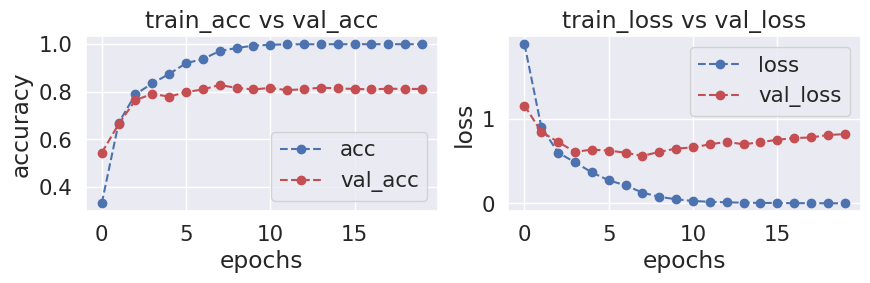

In [12]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [13]:
predictions = model.predict(X_test)

# Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

# Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

# Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

38/38 [==============================] - 3s 63ms/step
Predicted: 3, Actual: 2
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 5, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
